In [1]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

## Read the dataset

In [2]:
data= pd.read_csv("dlbcl-fl.csv")
data.head()

,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,class
0,-1,-45,176,97,-57,233,265,945,56,819,...,1036,-161,1523,-72,897,366,3,76,-28,DLBCL
1,25,-17,531,353,122,155,209,1688,42,639,...,4254,-75,6056,-68,737,81,-4,41,-45,DLBCL
2,73,91,257,80,614,507,760,2252,196,863,...,1934,-129,2901,-9,946,450,38,164,-62,DLBCL
3,267,41,202,138,198,355,245,1469,170,384,...,2469,93,2465,-119,339,321,-63,73,-13,DLBCL
4,16,24,187,39,145,254,571,930,-11,439,...,608,-39,1667,-87,721,213,15,155,-26,DLBCL


In [3]:
print(len(data)) # total no of rows
print(len(data.columns)) # total number of columns

77
7071


In [4]:
data["class"].unique() # unique class values

array(['DLBCL', 'FL'], dtype=object)

In [5]:
display(data)

,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,class
0,-1,-45,176,97,-57,233,265,945,56,819,...,1036,-161,1523,-72,897,366,3,76,-28,DLBCL
1,25,-17,531,353,122,155,209,1688,42,639,...,4254,-75,6056,-68,737,81,-4,41,-45,DLBCL
2,73,91,257,80,614,507,760,2252,196,863,...,1934,-129,2901,-9,946,450,38,164,-62,DLBCL
3,267,41,202,138,198,355,245,1469,170,384,...,2469,93,2465,-119,339,321,-63,73,-13,DLBCL
4,16,24,187,39,145,254,571,930,-11,439,...,608,-39,1667,-87,721,213,15,155,-26,DLBCL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,205,116,361,295,424,286,239,1376,249,540,...,1014,-531,1039,-325,412,-29,-264,-292,-384,FL
73,323,123,498,303,-91,135,231,1938,273,1795,...,1629,-378,311,-251,1571,861,-53,17,-396,FL
74,83,-63,164,120,176,344,396,1348,210,684,...,573,-26,1170,-262,322,-109,-221,-213,-318,FL
75,27,-194,346,107,11,125,60,982,143,550,...,501,-329,335,-214,875,157,-97,-120,-291,FL


## Trying Different Normalization Techniques

#### 1.The maximum absolute scaling

In [14]:
# The maximum absolute scaling :- rescaling each feature between -1 and 1 by dividing every observation by its maximum absolute value.
data2 = data.copy().drop("class",axis=1)
std1 = []
for colm in data2.columns:
    data2[colm] = data2[colm]/data2[colm].abs().max()
    std1.append(data2[colm].std())

display(data2)

,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,-0.000983,-0.046632,0.033314,0.108018,-0.046531,0.180620,0.225340,0.132131,0.031077,0.278571,...,0.207874,0.174528,-0.079822,0.127919,-0.042679,0.138747,0.306790,0.002182,0.057057,-0.016194
1,0.024582,-0.017617,0.100511,0.393096,0.099592,0.120155,0.177721,0.236018,0.023307,0.217347,...,0.231496,0.716644,-0.037184,0.508651,-0.040308,0.113998,0.067896,-0.002909,0.030781,-0.026027
2,0.071780,0.094301,0.048647,0.089087,0.501224,0.393023,0.646259,0.314877,0.108768,0.293537,...,0.266142,0.325809,-0.063956,0.243659,-0.005335,0.146326,0.377200,0.027636,0.123123,-0.035859
3,0.262537,0.042487,0.038236,0.153675,0.161633,0.275194,0.208333,0.205397,0.094340,0.130612,...,0.020472,0.415937,0.046108,0.207038,-0.070539,0.052436,0.269070,-0.045818,0.054805,-0.007519
4,0.015733,0.024870,0.035397,0.043430,0.118367,0.196899,0.485544,0.130034,-0.006104,0.149320,...,0.108661,0.102426,-0.019336,0.140013,-0.051571,0.111524,0.178541,0.010909,0.116366,-0.015038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.201573,0.120207,0.068332,0.328508,0.346122,0.221705,0.203231,0.192394,0.138180,0.183673,...,0.658268,0.170822,-0.263262,0.087267,-0.192650,0.063728,-0.024308,-0.192000,-0.219219,-0.222094
73,0.317601,0.127461,0.094265,0.337416,-0.074286,0.104651,0.196429,0.270973,0.151498,0.610544,...,0.642520,0.274427,-0.187407,0.026121,-0.148785,0.243001,0.721710,-0.038545,0.012763,-0.229034
74,0.081613,-0.065285,0.031043,0.133630,0.143673,0.266667,0.336735,0.188479,0.116537,0.232653,...,0.453543,0.096530,-0.012890,0.098270,-0.155305,0.049807,-0.091366,-0.160727,-0.159910,-0.183921
75,0.026549,-0.201036,0.065493,0.119154,0.008980,0.096899,0.051020,0.137304,0.079356,0.187075,...,0.376378,0.084400,-0.163114,0.028137,-0.126852,0.135344,0.131601,-0.070545,-0.090090,-0.168305


In [15]:
data2.isna().values.any() # checking if there is a missing data

False

In [7]:
def most_influence(data2,std1):
    s=[]
    cols = []
    for v in std1:
        s.append(v)
    s.sort(reverse=True)
    limit = int(input("Enter number:"))
    for i in range(limit):
        cols.append(data2.columns[std1.index(s[i])])
        i+=1
    return(cols)
most_imp = most_influence(data2,std1)
file = pd.DataFrame()
for c in most_imp:
    file[c]=list(data2[c])
file["class"] = list(data["class"])
file.head()

,U37221_at,M81933_at,D31897_at,D87071_at,M59941_at,U54999_at,X59798_at,U72263_s_at,X58288_at,U17032_at,class
0,0.646077,0.377049,0.128440,0.062555,0.208333,0.147453,-0.136897,0.193662,-0.451163,0.258824,DLBCL
1,-0.343907,-0.338798,0.608563,0.159471,-0.562500,-0.024129,0.878748,0.876761,0.716279,0.023529,DLBCL
2,0.196995,0.114754,-0.039755,0.209692,0.270833,0.632708,0.189048,0.253521,-0.586047,0.435294,DLBCL
3,-0.595993,0.464481,0.290520,-0.027313,-0.258929,-0.611260,0.647979,0.485915,0.432558,-0.058824,DLBCL
4,-0.626043,0.084699,0.721713,-0.311013,-0.505952,-0.782842,-0.178618,0.137324,0.251163,0.258824,DLBCL


C:\Users\shova\AppData\Local\Temp\ipykernel_6188\3147995716.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(file.corr(), annot=True)


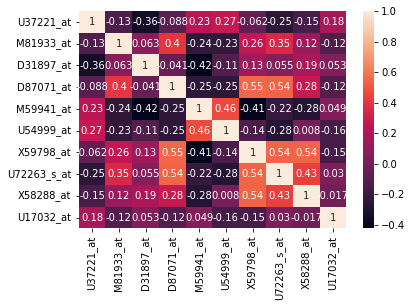

In [8]:
dataplot = sb.heatmap(file.corr(), annot=True)
mp.show()

In [9]:
file.to_csv("dlbcl_subset.csv",index=False)

#### 2.The min-max approach

In [9]:
data2 = data.copy().drop("class",axis=1)
std1 = []
for colm in data2.columns: #rescales the feature to a ? hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range.
    data2[colm] = (data2[colm]-data2[colm].min())/(data2[colm].max()-data2[colm].min())
    std1.append(data2[colm].std())

display(data2)

,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,0.117086,0.643807,0.027053,0.106027,0.177678,0.239021,0.218696,0.058832,0.096741,0.243041,...,0.273121,0.137020,0.879621,0.178820,0.958457,0.148624,0.553937,0.902423,0.731809,0.982102
1,0.139636,0.663401,0.094685,0.391741,0.292495,0.182865,0.170669,0.171494,0.089498,0.178801,...,0.294798,0.703769,0.920379,0.537330,0.960831,0.124159,0.400216,0.897839,0.713617,0.972286
2,0.181266,0.738978,0.042484,0.087054,0.608082,0.436285,0.643225,0.257013,0.169167,0.258744,...,0.326590,0.295174,0.894787,0.287804,0.995846,0.156116,0.599245,0.925344,0.777547,0.962471
3,0.349523,0.703989,0.032006,0.151786,0.341244,0.326854,0.201544,0.138287,0.155717,0.087794,...,0.101156,0.389398,1.000000,0.253322,0.930564,0.063303,0.529666,0.859201,0.730249,0.990762
4,0.131830,0.692092,0.029148,0.041295,0.307248,0.254140,0.481132,0.056558,0.062080,0.107423,...,0.182081,0.061641,0.937441,0.190209,0.949555,0.121713,0.471413,0.910282,0.772869,0.983256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.295750,0.756473,0.062298,0.327009,0.486209,0.277178,0.196398,0.124185,0.196586,0.143469,...,0.686416,0.133145,0.704265,0.140541,0.808309,0.074465,0.340885,0.727570,0.540541,0.776559
73,0.398092,0.761372,0.088398,0.335938,0.155869,0.168467,0.189537,0.209401,0.209002,0.591363,...,0.671965,0.241458,0.776777,0.082964,0.852226,0.251682,0.820928,0.865750,0.701143,0.769630
74,0.189939,0.631211,0.024767,0.131696,0.327133,0.318934,0.331046,0.119939,0.176410,0.194861,...,0.498555,0.055477,0.943602,0.150902,0.845697,0.060703,0.297735,0.755730,0.581601,0.814665
75,0.141370,0.539538,0.059440,0.117188,0.221296,0.161267,0.042882,0.064443,0.141749,0.147038,...,0.427746,0.042797,0.800000,0.084862,0.874184,0.145260,0.441208,0.836935,0.629938,0.830254


In [10]:
def most_influence(data2,std1):
    s=[]
    cols = []
    for v in std1:
        s.append(v)
    s.sort(reverse=True)
    limit = int(input("Enter number:"))
    for i in range(limit):
        cols.append(data2.columns[std1.index(s[i])])
        i+=1
    return(cols)
most_imp = most_influence(data2,std1)
file = pd.DataFrame()
for c in most_imp:
    file[c]=list(data2[c])
file["class"] = list(data["class"])
file.head()

,J02683_s_at,M26041_s_at,V00594_s_at,U14603_at,U57094_at,X03689_s_at,X95404_at,J03909_at,M14328_s_at,M63379_at,class
0,0.578631,0.660169,0.375231,0.265925,0.136310,0.720740,0.443628,0.447505,0.644290,0.053869,DLBCL
1,0.179623,0.865359,0.798557,0.514055,0.357227,0.074675,0.821188,0.679896,0.666145,0.366746,DLBCL
2,0.443243,0.417608,0.694409,0.611325,0.325499,0.427530,0.881157,0.553629,0.686435,0.590543,DLBCL
3,0.016181,0.003034,1.000000,0.712437,0.874266,0.161261,0.673729,0.692503,0.896116,0.286995,DLBCL
4,0.051309,0.854063,0.209306,0.416380,0.658049,0.268369,0.065285,0.040822,0.600812,0.012164,DLBCL


C:\Users\shova\AppData\Local\Temp\ipykernel_6188\3147995716.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(file.corr(), annot=True)


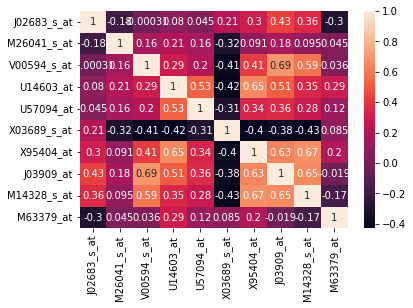

In [11]:
dataplot = sb.heatmap(file.corr(), annot=True)
mp.show()

In [10]:
file.to_csv("dlbcl_subset.csv",index=False)

#### 3.Z score normalization

In [12]:
data2 = data.copy().drop("class",axis=1)
std1 = []
for colm in data2.columns:
    data2[colm] = (data2[colm] - data2[colm].mean())/(data2[colm].std())
    std1.append(data2[colm].std())
display(data2)

,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,-0.726056,-0.291029,-0.428784,-0.563806,-0.804257,-0.453332,-0.291913,-0.779759,-0.382457,0.212129,...,-0.466838,-0.280452,0.188833,-0.186852,0.517440,0.140835,0.382374,0.515618,0.205253,0.580890
1,-0.566709,-0.116444,0.148141,0.967012,-0.129284,-0.750929,-0.538868,0.133985,-0.445249,-0.153556,...,-0.353514,3.298666,0.443247,1.921748,0.531364,-0.064671,-0.550188,0.489038,0.059224,0.521877
2,-0.272530,0.556954,-0.297147,-0.665462,1.725947,0.592072,1.890993,0.827594,0.245458,0.301519,...,-0.187304,0.718320,0.283498,0.454147,0.736739,0.203772,0.657234,0.648517,0.572410,0.462864
3,0.916445,0.245196,-0.386530,-0.318636,0.157296,0.012140,-0.380112,-0.135342,0.128845,-0.671611,...,-1.365879,1.313357,0.940244,0.251335,0.353835,-0.575869,0.235127,0.265009,0.192736,0.632961
4,-0.621868,0.139198,-0.410907,-0.910632,-0.042556,-0.373210,1.057520,-0.798206,-0.682959,-0.559874,...,-0.942801,-0.756482,0.549747,-0.119868,0.465226,-0.085222,-0.118265,0.561184,0.534860,0.587833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.536463,0.712834,-0.128133,0.620186,1.009496,-0.251119,-0.406571,-0.249714,0.483168,-0.354683,...,1.693882,-0.304921,-0.905743,-0.411993,-0.363239,-0.482106,-0.910124,-0.498211,-1.330133,-0.654916
73,1.259654,0.756480,0.094511,0.668024,-0.932464,-0.827236,-0.441850,0.441436,0.590811,2.194958,...,1.618333,0.379093,-0.453121,-0.750634,-0.105649,1.006532,2.002086,0.302980,-0.040910,-0.696572
74,-0.211242,-0.403262,-0.448285,-0.426271,0.074339,-0.029829,0.285785,-0.284149,0.308249,-0.062135,...,0.711737,-0.795409,0.588205,-0.351056,-0.143939,-0.597704,-1.171896,-0.334935,-1.000526,-0.425806
75,-0.554452,-1.220069,-0.152510,-0.504008,-0.547843,-0.865389,-1.195945,-0.734257,0.007747,-0.334368,...,0.341543,-0.875489,-0.308164,-0.739470,0.023146,0.112578,-0.301505,0.135907,-0.612507,-0.332079


In [13]:
def most_influence(data2,std1):
    s=[]
    cols = []
    for v in std1:
        s.append(v)
    s.sort(reverse=True)
    limit = int(input("Enter number:"))
    for i in range(limit):
        cols.append(data2.columns[std1.index(s[i])])
        i+=1
    return(cols)
most_imp = most_influence(data2,std1)
file = pd.DataFrame()
for c in most_imp:
    file[c]=list(data2[c])
file["class"] = list(data["class"])
file.head()

,A28102,class
0,-0.726056,DLBCL
1,-0.566709,DLBCL
2,-0.272530,DLBCL
3,0.916445,DLBCL
4,-0.621868,DLBCL
